In [4]:
import pickle
import pandas as pd

df1 = pd.read_parquet('../Daten/forecasts.parquet')
print(df1)

df2 = pd.read_parquet('../Daten/energy_test1.parquet')

df3 = pd.read_parquet('../Daten/energy_test2.parquet')

df4 = pd.read_parquet('../Daten/energy_train.parquet')

                    ref_datetime  valid_time  SolarDownwardRadiation  \
0      2020-09-20 00:00:00+00:00          20               -0.010547   
1      2020-09-20 00:00:00+00:00          21                0.001263   
2      2020-09-20 00:00:00+00:00          22                0.001532   
3      2020-09-20 00:00:00+00:00          23               -0.001624   
4      2020-09-20 00:00:00+00:00          24               -0.008356   
...                          ...         ...                     ...   
606792 2024-11-24 06:00:00+00:00          68                1.820000   
606793 2024-11-24 06:00:00+00:00          69                0.930000   
606794 2024-11-24 06:00:00+00:00          70                0.050000   
606795 2024-11-24 06:00:00+00:00          71                0.000000   
606796 2024-11-24 06:00:00+00:00          72                0.000000   

        CloudCover  Temperature Weather Model  
0         0.366211    13.823755      DWD ICON  
1         0.471512    13.427564      DW

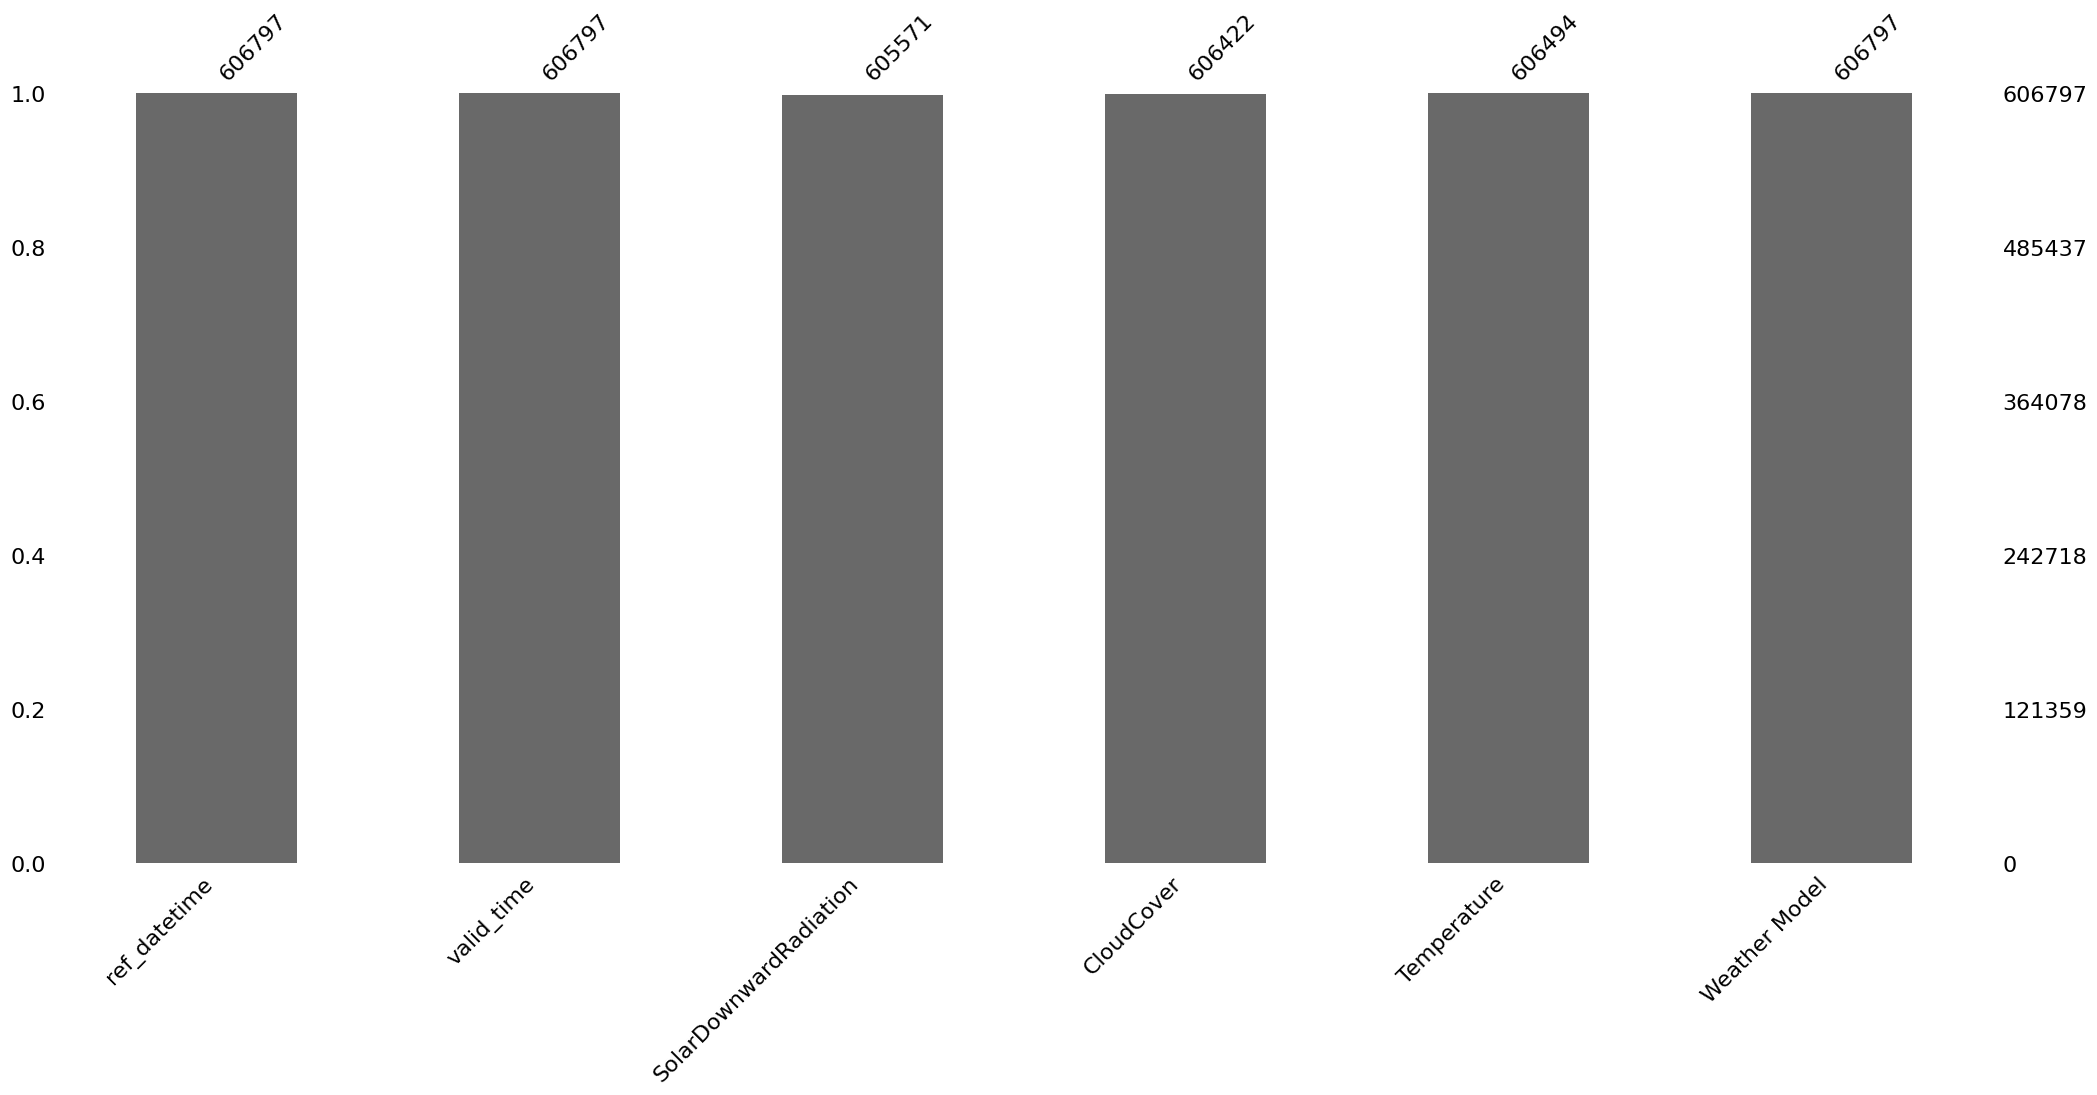

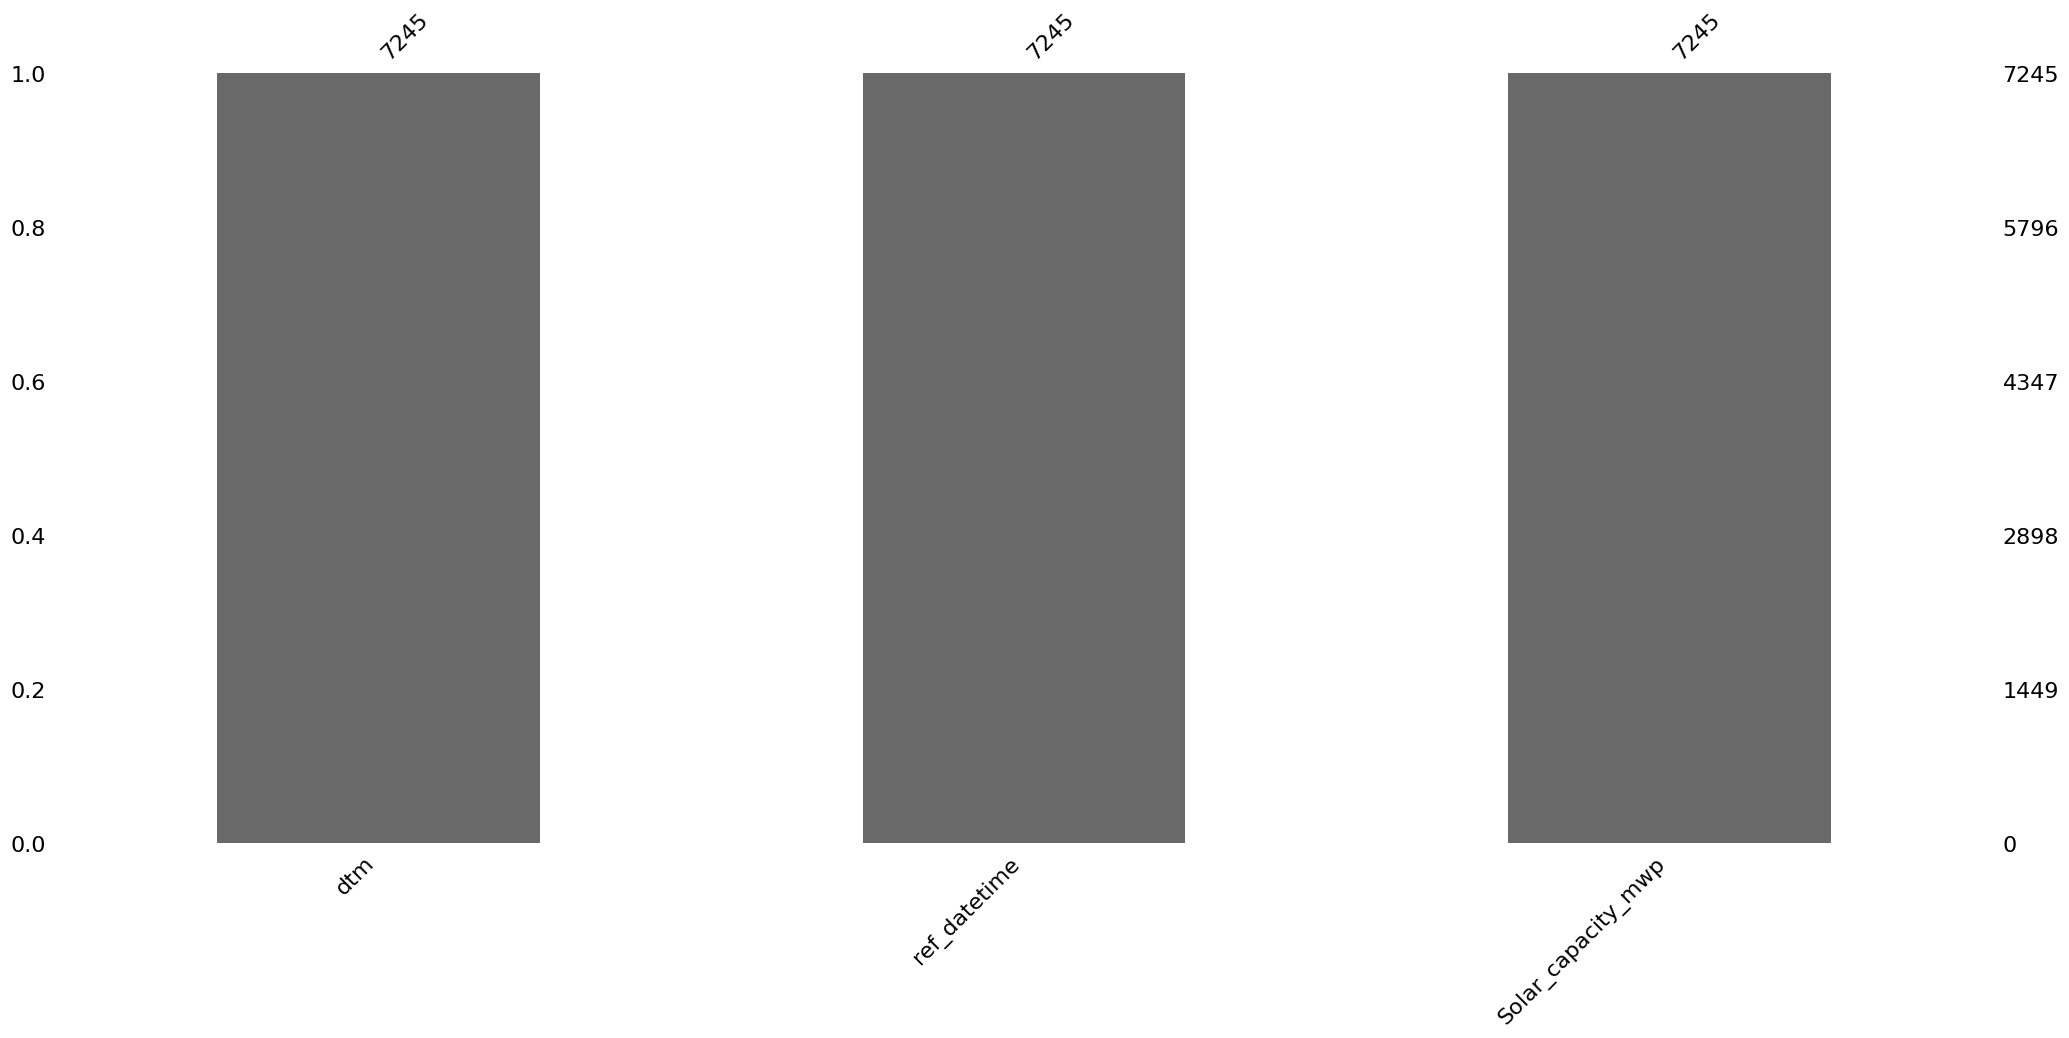

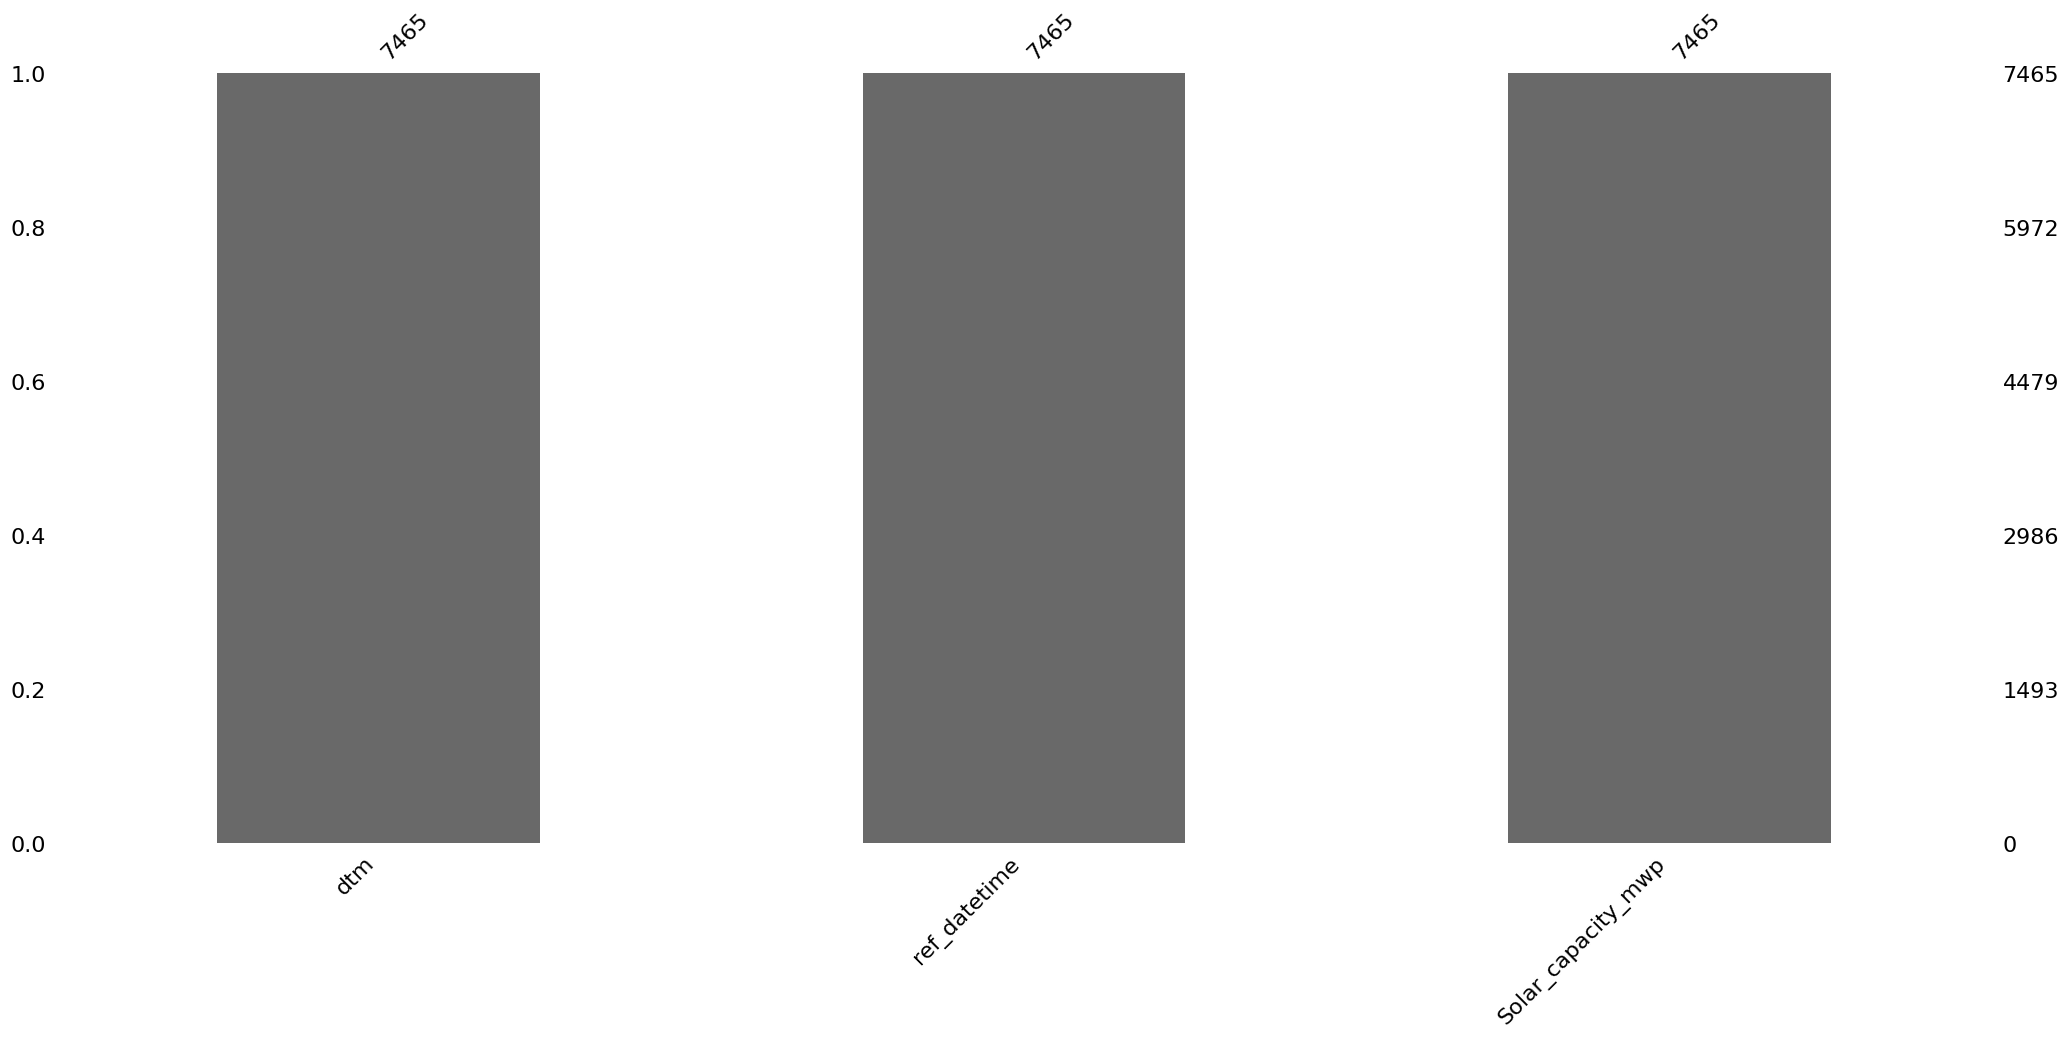

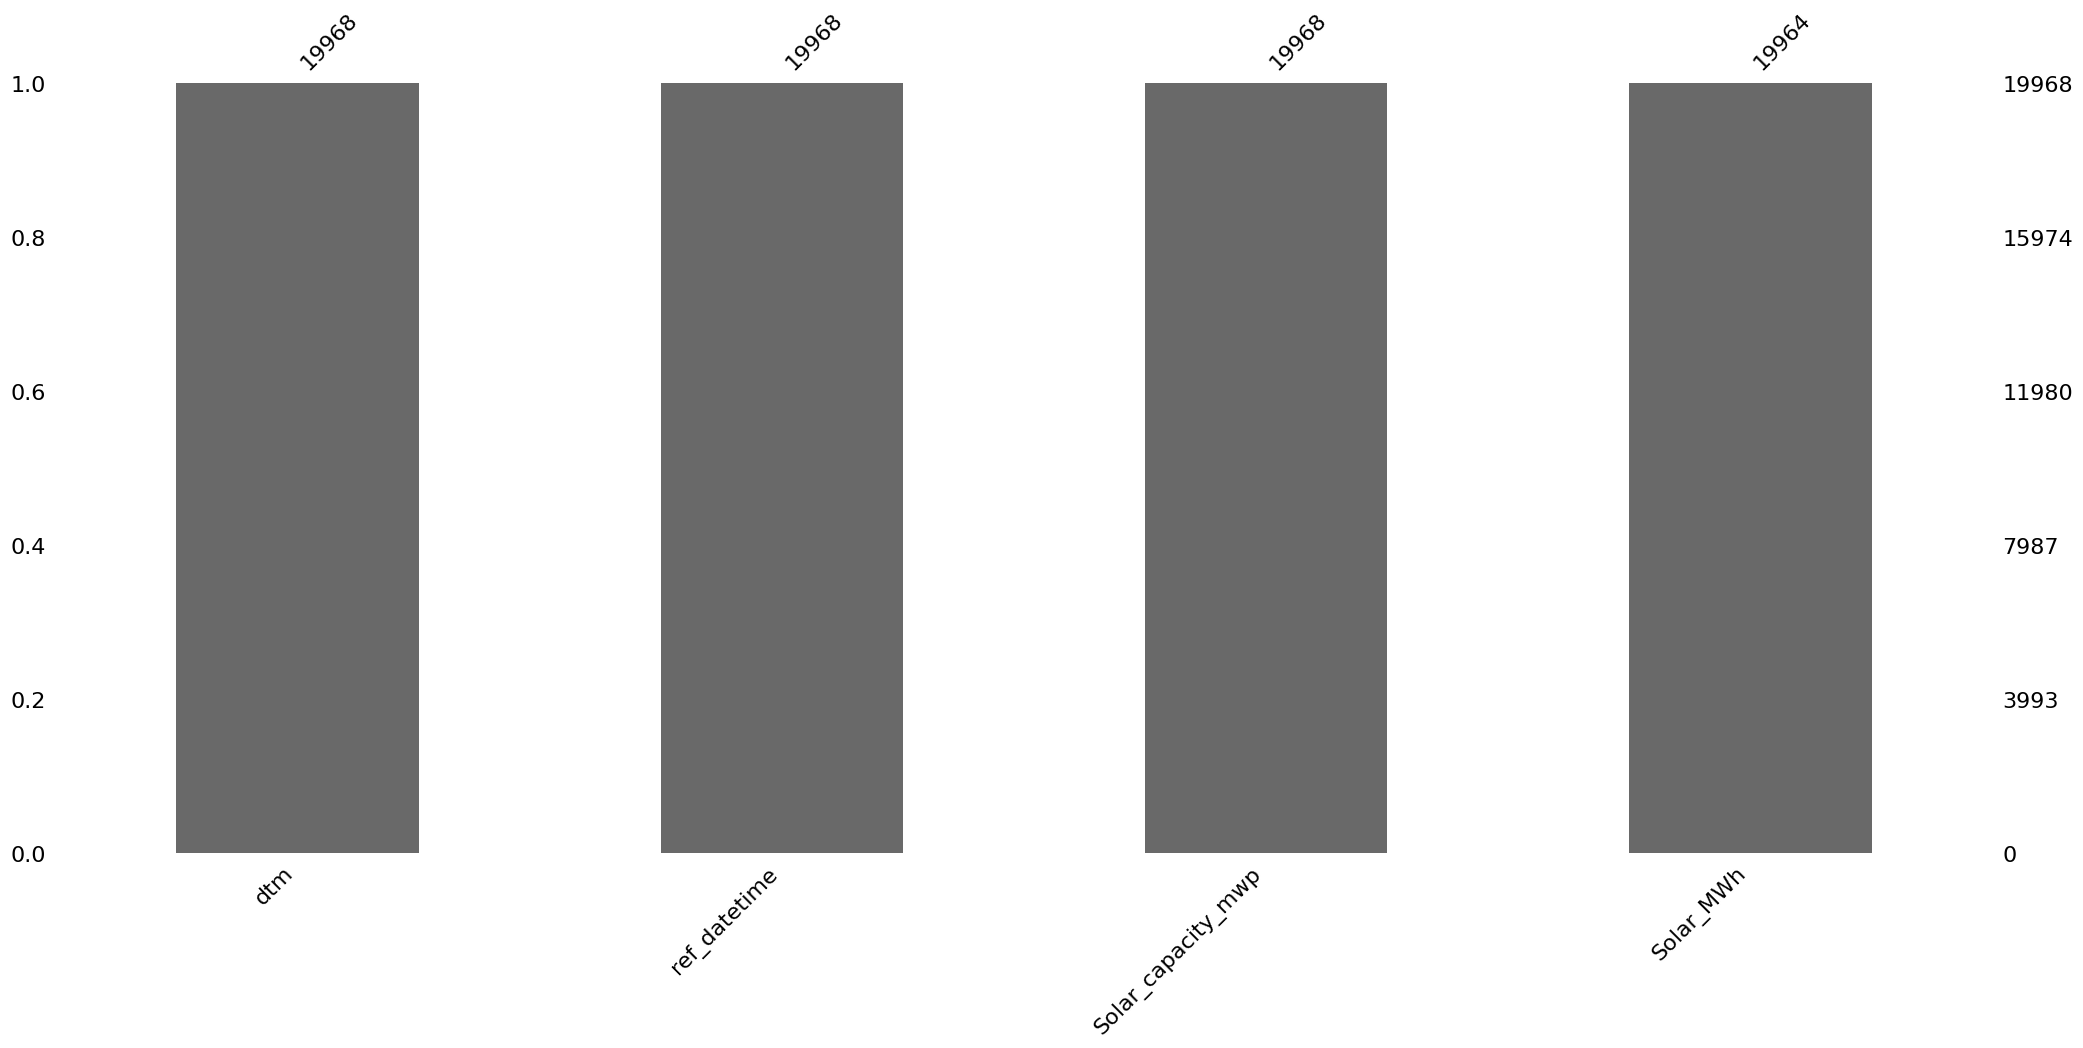

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

# Ein Barplot der fehlenden Werte pro Spalte
msno.bar(df1)
plt.show()

msno.bar(df2)
plt.show()

msno.bar(df3)
plt.show()


msno.bar(df4)
plt.show()


